Wahlpflichtfach Künstliche Intelligenz I: Testat

---

# 02 - Testat zu Scikit-learn (sklearn)
__Gruppennummer:__ #

__Mitglieder:__
- Person A
- Person B
- ...

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

In diesem Testat werden Sie die unterschiedlichen Arbeitsschritte von der Datenvorverarbeitung über die Modell- und Teststrategieauswahl bis hin zur Evaluierung mit Hilfe von Scikit-learn durchführen. Dabei verwenden wir eine leicht modifizierte Variante des [California Housing Datasets](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). Dieses enthält die folgenden _acht_ Merkmale:
- __MedInc:__ Das mittlere Einkommen im Block
- __HouseAge:__ Das mittlere Hausalter im Block
- __AveRooms:__ Die durchschnittliche Raumanzahl pro Haushalt im Block
- __AveBedrms:__ Die durchschnittliche Schlafzimmeranzahl pro Haushalt im Block
- __Population:__ Die Bevölkerunganzahl im Block
- __AveOccup:__ Die durchschnittliche Anzahl von Personen pro Haushalt im Block
- __Latitude:__ Der Breitengrad des Blocks
- __Longitude:__ Der Längengrad des Blocks

Jedem Datenpunkt ist genau einer Klasse (_low_, _mid-low_, _mid_, _mid-high_, _high_) zugeordnet, die angibt, wie hoch der mittlere Hauswert im Block ist. Jede Klasse enthält ~20% der Datenpunkte.

## Aufgabe 0 - Data Understanding
__unbenotet__

Laden Sie die Daten und machen Sie sich mit ihnen vertraut. 

In [2]:
housing_df = pd.read_csv('california_housing_data.csv')
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,high
1,1.3578,40.0,4.524096,NaN,409.0,2.463855,37.85,-122.27,mid-low
2,2.0978,52.0,4.215190,1.060759,946.0,2.394937,37.83,-122.26,mid-low
3,3.3929,NaN,5.994652,1.128342,554.0,2.962567,37.83,-122.29,low
4,NaN,17.0,3.197232,1.000000,609.0,2.107266,37.81,-122.28,mid
...,...,...,...,...,...,...,...,...,...
1027,3.1908,16.0,4.386792,0.981132,1386.0,2.179245,38.54,-121.72,mid
1028,NaN,38.0,6.408696,1.039130,1123.0,2.441304,38.67,-121.78,mid-low
1029,2.8365,32.0,5.371901,1.060606,1145.0,3.154270,38.76,-121.77,low
1030,3.1029,18.0,4.945455,1.112121,769.0,2.330303,NaN,-121.57,low


Eventuell hilft Ihnen auch der folgende Graph.

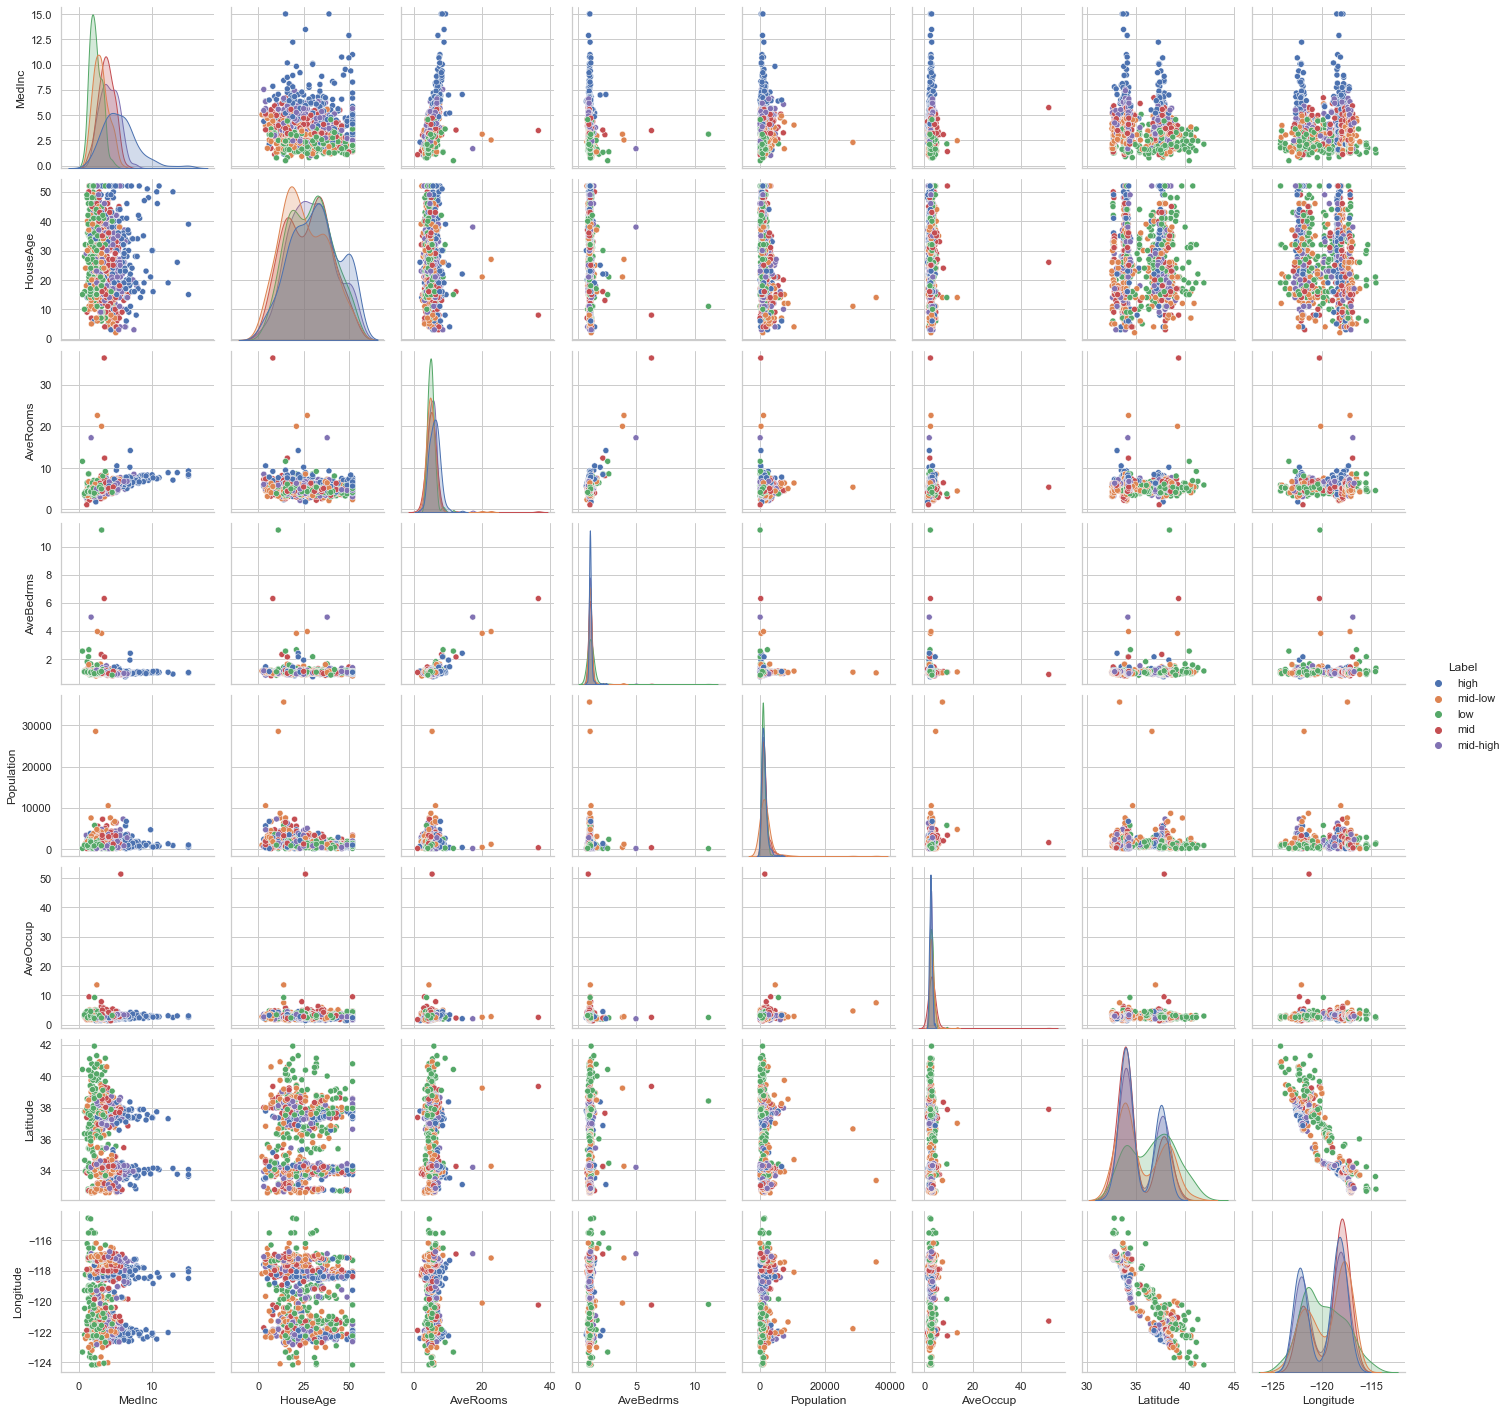

In [3]:
sns.set_theme(style="whitegrid")
sns.pairplot(housing_df, hue="Label")

## Aufgabe 1 - Data Preparation (4 Punkte)
Die erste Aufgabe ist es den Datensatz fürs maschinelle Lernen vorzubereiten. Dazu sind die folgenden Schritte nötig:
- a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte
- b) Auswahl der Strategie(n) zur Skalierung der Daten
- c) Erstellen der Preparation-Pipeline

Da das Ersetzen der fehlenden Werte und die Skalierung der Daten in einer `Pipeline` passieren soll, können Sie nur Algorithmen verwenden, die __sklearn__ bereitstellt.

_Hinweise/Tipps:_ 
- Sie müssen die unterschiedlichen Algorithmen nicht (bis zum Maximum) optimieren, hier geht es gerade eher darum zu überprüfen, ob Sie die Algorithmen generell verstanden haben und Sie richtig einsetzen/kombinieren können.
- Gucken Sie sich nochmal die besprochenen Algorithmen an und überlegen wo die Stärken und Schwächen liegen.
- Sie können selbstverständlich auch unterschiedliche Methoden für die einzelnen Merkmale wählen.  

### a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte
_Punkte: 1_

Als erstes müssen Sie sich eine Strategie zum Ersetzen der fehlenden Werte überlegen. Beschreiben Sie diese in der nachfolgenden Markdown-Zeile und begründen Sie, warum Sie diese Strategie gewählt haben. 

__Ihre Antwort:__



### b) Auswahl der Strategie(n) zur Skalierung der Daten
_Punkte: 1_

Außerdem sollten die Daten skaliert/normalisiert werden. Beschreiben Sie Ihre Strategie und begründen Sie warum Sie diese Strategie bzw. Methoden gewählt haben.

__Ihre Antwort:__




### c) Erstellen der Preparation-Pipeline
_Punkte: 2_

In der nächsten Codezeile können Sie nun die `preparation_pipeline` erstellen. In dieser sollen beide vorherigen Schritte enthalten sein. Sie müssen die Pipeline aber noch nicht "trainieren" (Aufruf der Methode `fit()`).

In [ ]:
from sklearn.pipeline import Pipeline 
# Hier können Sie die weiteren benötigten Imports hinzufügen

### BEGIN SOLUTION
preparation_pipeline = Pipeline() # IHRE LÖSUNG HIER
### END SOLUTION

Warum macht es noch keinen Sinn die Pipeline jetzt schon zu trainieren?

__Ihre Antwort:__



## Aufgabe 2 - Trainingsvorbereitung und Modellauswahl  (4 Punkte)
Ihre nächste Aufgabe ist es das Training vorzubereiten und den richtigen ML-Algorithmus auszuwählen. Dafür müssen Sie die folgenden Teilaufgaben erledigen:
- a) Erstellen des Test- und Trainingsdatenset
- b) Kreuzvalidierung im Trainingsprozess
- c) Optimieren eines ML-Algorithmus
- d) Testen der trainierten Pipeline

### a) Erstellen des Test- und Trainingsdatenset
_Punkte: 0,5_

Zuerst benötigen wir ein Test- und ein Trainingsdatenset. Das Testdatenset soll 30% der gesamten Daten enthalten. 

In [ ]:
# get the data and target from the data frame 
data = housing_df.loc[:, :'Longitude']
target = housing_df['Label']

### BEGIN SOLUTION
# IHRE LÖSUNG HIER
train_data = None
test_data = None
train_label = None
test_label = None
### END SOLUTION

### b) Kreuzvalidierung im Trainingsprozess
_Punkte: 1_

Was ist unter Kreuzvalidierung im Trainingsprozess zu verstehen und wieso wird es verwendet?

__Ihre Antwort:__




### c) Optimieren eines ML-Algorithmus
_Punkte: 1,5_

Im nächsten Schritt optimieren wir einen ML-Algorithmus. Da wir ein Klassifikationsproblem lösen wollen, kommen nur Klassifikationsalgorithmen als mögliche Algorithmen in Frage. Wir werden den [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) verwenden. 

Der `RandomForestClassifier` soll eine maximale Tiefe von 6 haben und maximal 75% der Daten pro Baum verwenden. Setzen Sie den `random_state` auf 0. Für die Anzahl der Bäume sollen die folgenden Werte überprüft werden: `[30, 40, 50, 60, 70, 80]`. Außerdem sollen die beiden Möglichkeiten `['gini', 'entropy']` für das Kriterium, nach dem geteilt wird, getestet werden.

Führen Sie die folgenden Schritte durch:
- Erstellen Sie eine Pipeline, die zuerst die vorher bereits erstellte Vorverarbeitung durchführt und anschließend den `RandomForestClassifier` aufruft. 
- Finden Sie die optimalen Parameter aus den angegebenen Parameterbereichen.
- Speichern Sie die `Pipeline` mit den besten Parametern in der Variable `trained_pipeline`
- Geben Sie die beste `Pipeline` aus

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Hier können Sie weitere benötigte Importe hinzufügen

### BEGIN SOLUTION
# IHRE LÖSUNG HIER
### END SOLUTION

### d) Testen der trainierten Pipeline
_Punkte: 1_

Nachdem Sie die `Pipeline` trainiert haben, ist es nun Zeit diese zu testen. Lassen Sie sich dafür den Score einmal für das Test- und einmal für das Trainingsdatenset berechnen. Was fällt auf? Welche Metrik wird für das berechnen verwendet bzw. was sagt sie aus? Ist diese Metrik hier sinnvoll?

In [ ]:
### BEGIN SOLUTION
# IHRE LÖSUNG HIER
### END SOLUTION

__Ihre Antwort:__


## Aufgabe 3 - Weitere Evaluierung und Visualisierung (2 Punkte)
Im letzten Schritt wollen wir uns die Ergebnisse noch einmal genauer angucken, um eventuell zu verstehen, was passiert ist. Dazu sind die folgenden Teilaufgaben zu erledigen:
- a) Erstellen eines Confusion Matrix-Diagramms
- b) Analyse des Einfluss des Parameters n_estimators auf das Ergebnis

### a) Erstellen eines Confusion Matrix-Diagramms
_Punkte: 1_

Erstellen Sie mit Hilfe der `ConfusionMatrixDisplay`-Funktion das Diagramm der Confusion Matrix. Analysieren Sie dieses anschließend.

_Tipps:_
- Welche Klassen wurden falsch klassifiziert?
- Was könnten mögliche Gründe dafür sein?

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

### BEGIN SOLUTION
# IHRE LÖSUNG HIER
### END SOLUTION

__Ihre Antwort:__

### b) Analyse des Einfluss des Parameters n_estimators auf das Ergebnis
_Punkte: 1_

Zum Schluss wollen wir noch einmal analysieren welchen Einfluss der Parameter `n_estimators` auf das Trainingsergebnis hat. Verwenden Sie dafür die Funktion `validation_curve`, um für den getesteten Parameterbereich des Parameters die nötigen Daten zu sammeln. Speichern Sie die Rückgabe in den Variablen `train_scores` und `valid_score`. Erstellen Sie außerdem eine Variable `n_estimators`, die alle möglichen Werte für den Parameter enthält. 

Welche Rückschlüsse lässt das Diagramm zu?

In [ ]:
from sklearn.model_selection import validation_curve

### BEGIN SOLUTION
# IHRE LÖSUNG HIER
### END SOLUTION

In [ ]:
# first, calculate the means and standard deviations
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

# create the figure
plt.figure(figsize=(10, 10))
plt.title("Validation Curve of RandomForestClassifier with different n_estimators values")
plt.xlabel("n_estimators")
plt.ylabel("Score")
# plot the training score
plt.plot(n_estimators, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_estimators, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 color="darkorange",
                 alpha=0.2
                )
# plot the validation score
plt.plot(n_estimators, valid_scores_mean, label="Cross-validation score", color="navy")
plt.fill_between(n_estimators, 
                 valid_scores_mean - valid_scores_std, 
                 valid_scores_mean + valid_scores_std, 
                 color="navy",
                 alpha=0.2
                )

plt.legend(loc="best")
plt.show()

__Ihre Antwort:__

---

Wahlpflichtfach Künstliche Intelligenz I: Testat